In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from scipy.sparse import hstack
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import average_precision_score , roc_auc_score




In [3]:
df = pd.read_csv('raw_data_wlabels.csv').drop('Unnamed: 0',axis=1).dropna()

y = df['y']
xdata = df.drop('y',axis=1)

data_train,data_val,ytrain,yval = train_test_split(xdata,
                                                    y,
                                                    test_size = 0.5,
                                                    random_state=0)


In [4]:
# Vetorizando os titulos
title_train = data_train['titles']
title_val = data_val['titles']

title_vec = TfidfVectorizer(min_df = 2,ngram_range=(1,1))

title_bow_train = title_vec.fit_transform(title_train)
title_bow_val = title_vec.transform(title_val)

autor_train = data_train['author']
autor_val = data_val['author']

autor_vec = TfidfVectorizer(min_df = 1,ngram_range=(1,1))

autor_bow_train = title_vec.fit_transform(autor_train)
autor_bow_val = title_vec.transform(autor_val)


In [5]:
mask_train = data_train.drop(['titles','author'],axis=1)
mask_val = data_val.drop(['titles','author'],axis=1)

xtrain_wvec = hstack([title_bow_train,autor_bow_train,mask_train])
xval_wvec = hstack([title_bow_val,autor_bow_val,mask_val])



# Random Forest

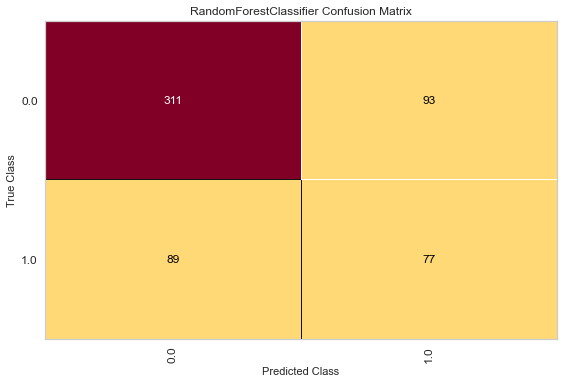

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [6]:
rdf = ConfusionMatrix(RandomForestClassifier(n_estimators = 1000,random_state=0,min_samples_leaf=3,class_weight = 'balanced', n_jobs=6))
rdf = rdf.fit(xtrain_wvec,ytrain)
rdf.score(xval_wvec, yval)
rdf.poof()

In [7]:
p = rdf.predict_proba(xval_wvec)[:,1]

In [10]:
print(f'Random Forest Metrics \nAVG : {average_precision_score(yval,p)} \nROC : {roc_auc_score(yval,p)}')

Random Forest Metrics 
AVG : 0.48340197848954136 
ROC : 0.6663858403912681
